**Tutotrial 1**

In this tutorial, we shall use famous Python packages to do basic data analysis. This includes Pandas, Sklearn and Pandas profiling package.

Run the following code to start installing Python packages.

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 5.1 MB/s 
     |████████████████████████████████| 102 kB 25.8 MB/s 
     |████████████████████████████████| 9.9 MB 38.0 MB/s 
     |████████████████████████████████| 679 kB 45.8 MB/s 
     |████████████████████████████████| 62 kB 497 kB/s 
     |████████████████████████████████| 4.7 MB 3.8 MB/s 
     |████████████████████████████████| 296 kB 13.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8f24512297cb13e38736bf8b713750f6cbbf8b8f2fa4064225d4b8ded5da1e7b
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found ex

Upload your data set file to Google Drive. I am uploading german_credit.arff file. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, I have already defined the correct data types. This means you just need to run the following code snippet to load correct data types for the three dataset in this project..

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Outlier_Removed_german_credit_2022_12_01.arff to Outlier_Removed_german_credit_2022_12_01.arff


In [3]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="Outlier_Removed_german_credit_2022_12_01.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
#data_file="bank.arff"
#data_file="churn.arff"
data=arff.loadarff("Outlier_Removed_german_credit_2022_12_01.arff")

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [4]:
# Let's display first 10 records 
df.head(10)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2
5,1,1,10.0,4,0,2241.0,1,2,1.0,3,...,3,1,48.0,3,1,2.0,2,2.0,1,2
6,1,1,8.0,4,0,3398.0,1,4,1.0,3,...,4,1,39.0,3,2,2.0,2,1.0,1,2
7,1,1,6.0,4,0,1361.0,1,2,2.0,3,...,4,1,40.0,3,2,1.0,2,2.0,1,2
8,1,4,18.0,4,3,1098.0,1,1,4.0,2,...,4,3,65.0,3,2,2.0,1,1.0,1,1
9,1,2,24.0,2,3,3758.0,3,1,1.0,2,...,4,4,23.0,3,1,1.0,1,1.0,1,1


In [5]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      975 non-null    object 
 1   Account Balance                    975 non-null    object 
 2   Duration of Credit (month)         975 non-null    float64
 3   Payment Status of Previous Credit  975 non-null    object 
 4   Purpose                            975 non-null    object 
 5   Credit Amount                      975 non-null    float64
 6   Value Savings/Stocks               975 non-null    object 
 7   Length of current employment       975 non-null    object 
 8   Instalment per cent                975 non-null    float64
 9   Sex & Marital Status               975 non-null    object 
 10  Guarantors                         975 non-null    object 
 11  Duration in Current address        975 non-null    object 

In [6]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,20.402051,3008.264615,2.986667,35.455385,1.412308,1.156923
std,11.482707,2295.588838,1.114966,11.282166,0.580530,0.363915
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1353.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2255.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3839.500000,4.000000,42.000000,2.000000,1.000000
max,60.000000,11760.000000,4.000000,75.000000,4.000000,2.000000


# *There are two sections in this tutorial. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding. German Credit card data set would work in both sections and other datasets would require their string values to be encoded into numeric first, so they will work with only Section 2.* 

# Section 1
### Test Section 1 with only German credit card dataset.


**Let's develop a decison tree in Python**

In [16]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


If you want to learn more about any Python statement just use help function; e.g., here  I am displaying help on decision tree

In [18]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Let's plot the ree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. Recall that decision tree algorithm can handle categorical and numerical data but Sklearn's implementation can only handle numeric data types. So it is not a comprehensive implementation of decision tree. 

In [19]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)

Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

class Names ['1' '0']


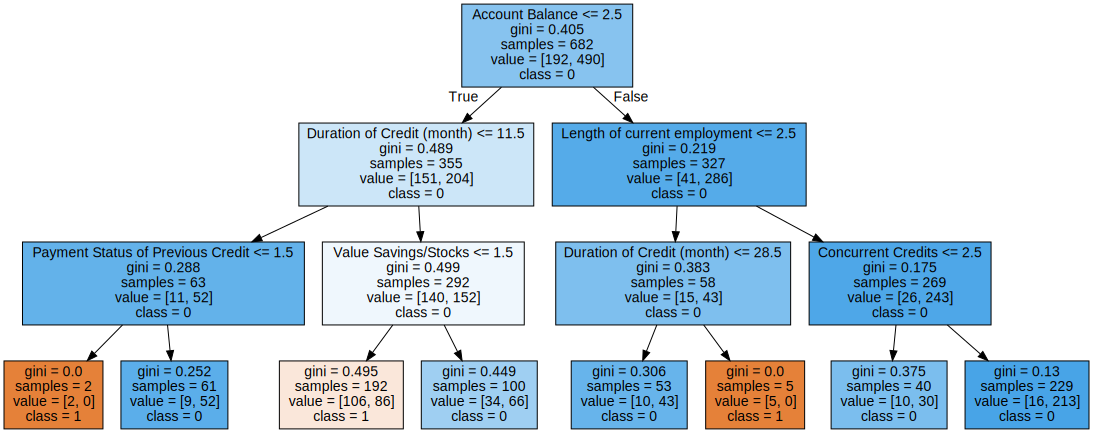

In [20]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In [21]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 54  36]
 [ 57 146]]
TP:  146 , FP:  36 , TN:  54 , FN: 57


In [22]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        90
           1       0.80      0.72      0.76       203

    accuracy                           0.68       293
   macro avg       0.64      0.66      0.65       293
weighted avg       0.71      0.68      0.69       293



**In a similar way, we can train and test Naive Bayes**

Multinomial Naive Bayes is the Naive Bayes type we studied in the class. Recall that the NB that we studied measures the conditional probabilites of words by using their counts/frequencies in each document . In the lab 6, you used CountVectorizer class in Sklearn pacakge to convert documents and words into a table/matrix where each column represented a word and each row represented a document. In the case of the dataset that we are using now, it is already in the form of a table/matrix. Each row represents one record (a kinda document) and each column represents one attribute (a kinda word). After the matrix of frequencies, remaining process is the same.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [34]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [198. 484.]
Log prior probability for classes  [-1.23676263 -0.34294475]
Log conditional probability for each feature given a class
 [[ -4.9886883   -0.02203814  -7.05020046  -4.66817616  -7.84291524
   -8.03758711  -8.93433325  -9.33979836 -11.06903747  -9.88341381
  -11.06903747 -10.47120047  -8.69624812 -10.57656099  -9.88341381
   -9.40648973 -10.82787541 -12.36832045  -9.70573263  -9.75336068
  -12.08063838 -11.52102259 -10.90198339 -12.77378556 -10.33143853
   -8.46298644 -10.69434402 -11.16434765 -11.85749483 -10.33143853
  -10.6337194   -9.55490974  -9.29254547 -10.09963691  -9.72926313
  -10.98202609  -9.09748489  -8.93433325 -10.57656099  -8.27397589
  -10.75888254 -11.67517327 -10.20883621  -9.24742504 -10.13472823
   -9.08490611  -9.63829135  -9.49664083  -9.23282624  -9.94057222
   -9.70573263 -10.90198339  -8.490199    -9.57511245  -8.60712034
  -10.33143853 -11.85749483  -9.85601483  -8.5917354

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [35]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.31      0.38      0.34        84
           1       0.73      0.67      0.69       209

    accuracy                           0.58       293
   macro avg       0.52      0.52      0.52       293
weighted avg       0.61      0.58      0.59       293



# Section 2: Categorical to One-Hot (numeric) Encoding 
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [36]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
          "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
#cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
#cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [37]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,Creditability,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents,Account Balance_1,Account Balance_2,Account Balance_3,...,Type of apartment_2,Type of apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,1,18.0,1049.0,4.0,21.0,1.0,1.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,9.0,2799.0,2.0,36.0,2.0,2.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,12.0,841.0,2.0,23.0,1.0,1.0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,1,12.0,2122.0,3.0,39.0,2.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1,12.0,2171.0,4.0,38.0,2.0,1.0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0,12.0,6199.0,4.0,28.0,2.0,1.0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
971,0,24.0,1987.0,2.0,21.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
972,0,24.0,2303.0,4.0,45.0,1.0,1.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
973,0,12.0,6468.0,2.0,52.0,1.0,1.0,0,1,0,...,1,0,0,0,0,1,0,1,1,0


In [38]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
#df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
#df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [39]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [40]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [41]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [198. 484.]
Log prior probability for classes  [-1.23676263 -0.34294475]
Log conditional probability for each feature given a class
 [[ -4.9886883   -0.02203814  -7.05020046  -4.66817616  -7.84291524
   -8.03758711  -8.93433325  -9.33979836 -11.06903747  -9.88341381
  -11.06903747 -10.47120047  -8.69624812 -10.57656099  -9.88341381
   -9.40648973 -10.82787541 -12.36832045  -9.70573263  -9.75336068
  -12.08063838 -11.52102259 -10.90198339 -12.77378556 -10.33143853
   -8.46298644 -10.69434402 -11.16434765 -11.85749483 -10.33143853
  -10.6337194   -9.55490974  -9.29254547 -10.09963691  -9.72926313
  -10.98202609  -9.09748489  -8.93433325 -10.57656099  -8.27397589
  -10.75888254 -11.67517327 -10.20883621  -9.24742504 -10.13472823
   -9.08490611  -9.63829135  -9.49664083  -9.23282624  -9.94057222
   -9.70573263 -10.90198339  -8.490199    -9.57511245  -8.60712034
  -10.33143853 -11.85749483  -9.85601483  -8.5917354

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


We have probailities of a lot more features now.

See evaluation metrics below.

In [43]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 32  52]
 [ 70 139]]
TP:  139 , FP:  52 , TN:  32 , FN: 70


In [44]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.31      0.38      0.34        84
           1       0.73      0.67      0.69       209

    accuracy                           0.58       293
   macro avg       0.52      0.52      0.52       293
weighted avg       0.61      0.58      0.59       293



**Let's run decision tree on one-hot encoded data**

class Names ['1' '0']


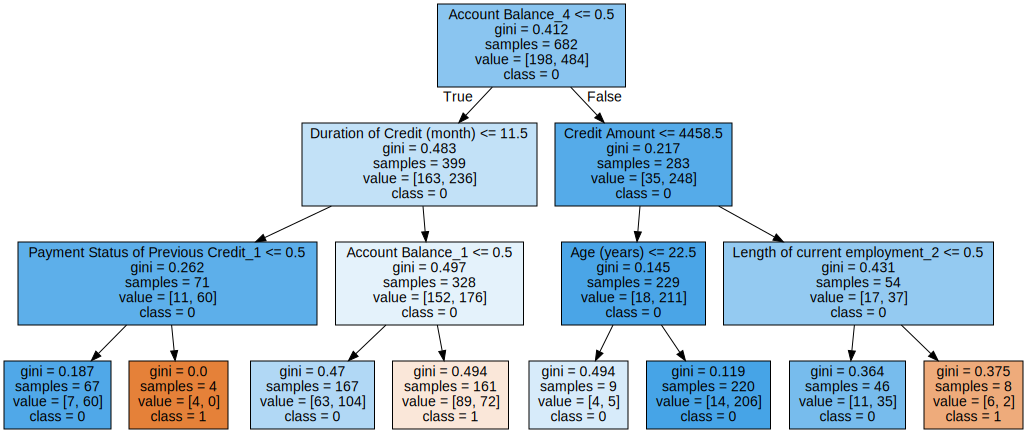

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [47]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [48]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.45      0.48        84
           1       0.79      0.82      0.81       209

    accuracy                           0.72       293
   macro avg       0.65      0.64      0.64       293
weighted avg       0.71      0.72      0.71       293



**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use: 

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```

